In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
%matplotlib inline

Dataset source = https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [3]:
data = pd.read_csv('Customer.csv')

In [4]:
data.shape

(440, 8)

In [5]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
data = data.drop(columns = ['Channel','Region'],axis = 1)

In [7]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


1. Mean is greater than median indicating positive skewness. 
2. Unusal: standard deviation are larger than mean.
3.Since minimum and maximum values are fairly ar extreme, large standard deviation is expected. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

np.random.seed(1)

new_data = data.copy()
new_data = new_data.drop(columns = ['Grocery'] , axis = 1)

x_train, x_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size=0.25, random_state=1)
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

score = regressor.score(x_test,y_test)
print("The decision tree regressor r2 score is ", score)

The decision tree regressor r2 score is  0.7957683115761958


Grocery purchase is dependent on other feature columns. Whereas other features [Fresh,Frozen,Delicatessen] generates negative r2 score.  

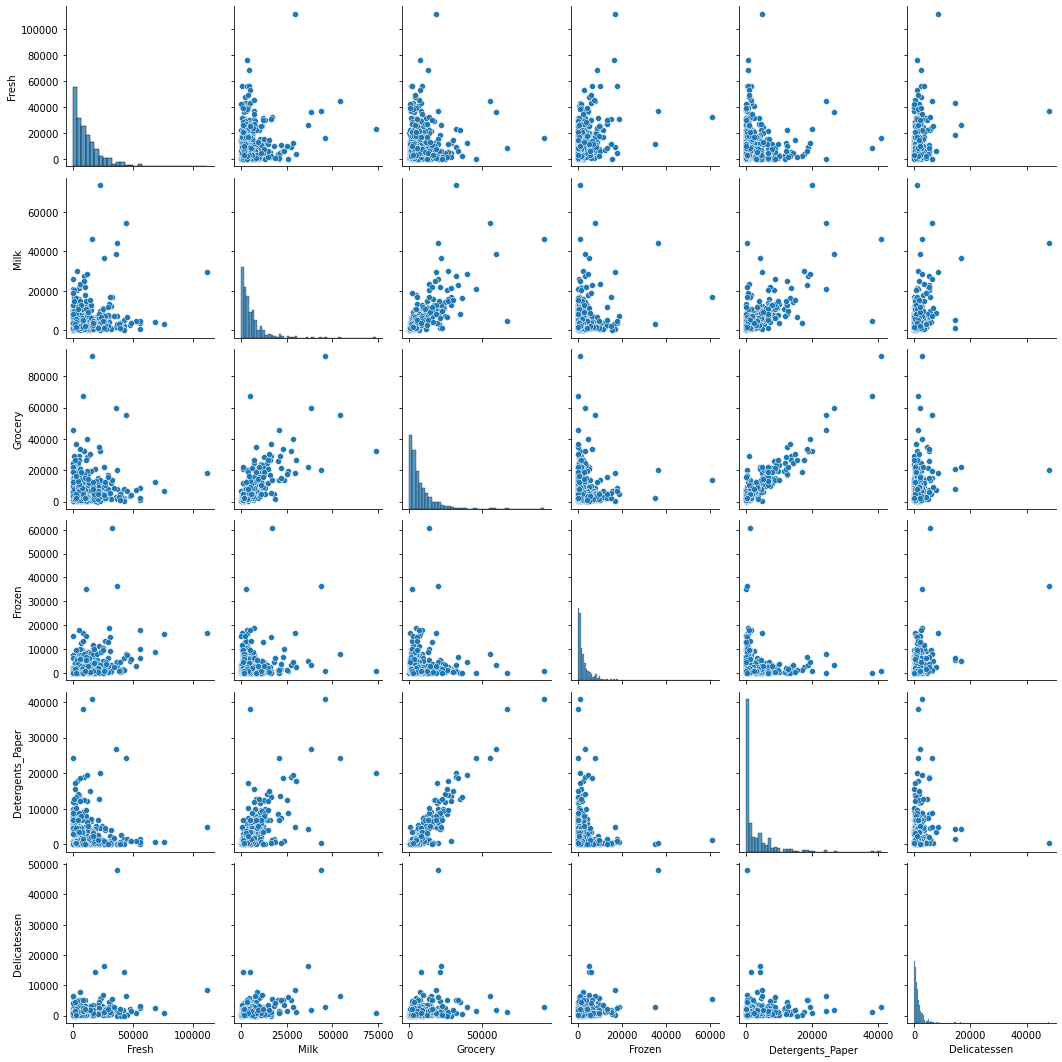

In [9]:
sns.pairplot(data)

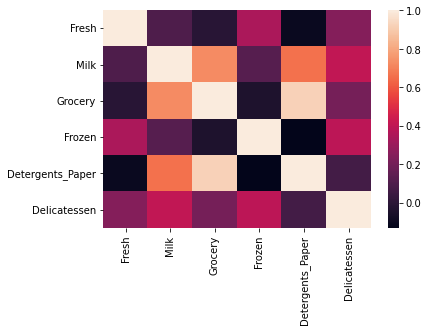

In [10]:
sns.heatmap(data.corr())

In [11]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Highly correlated pairs:

Grocery-Detergents_papers = 0.924641 

Milk-Detergents_papers = 0.661816

Milk-Grocery = 0.728335


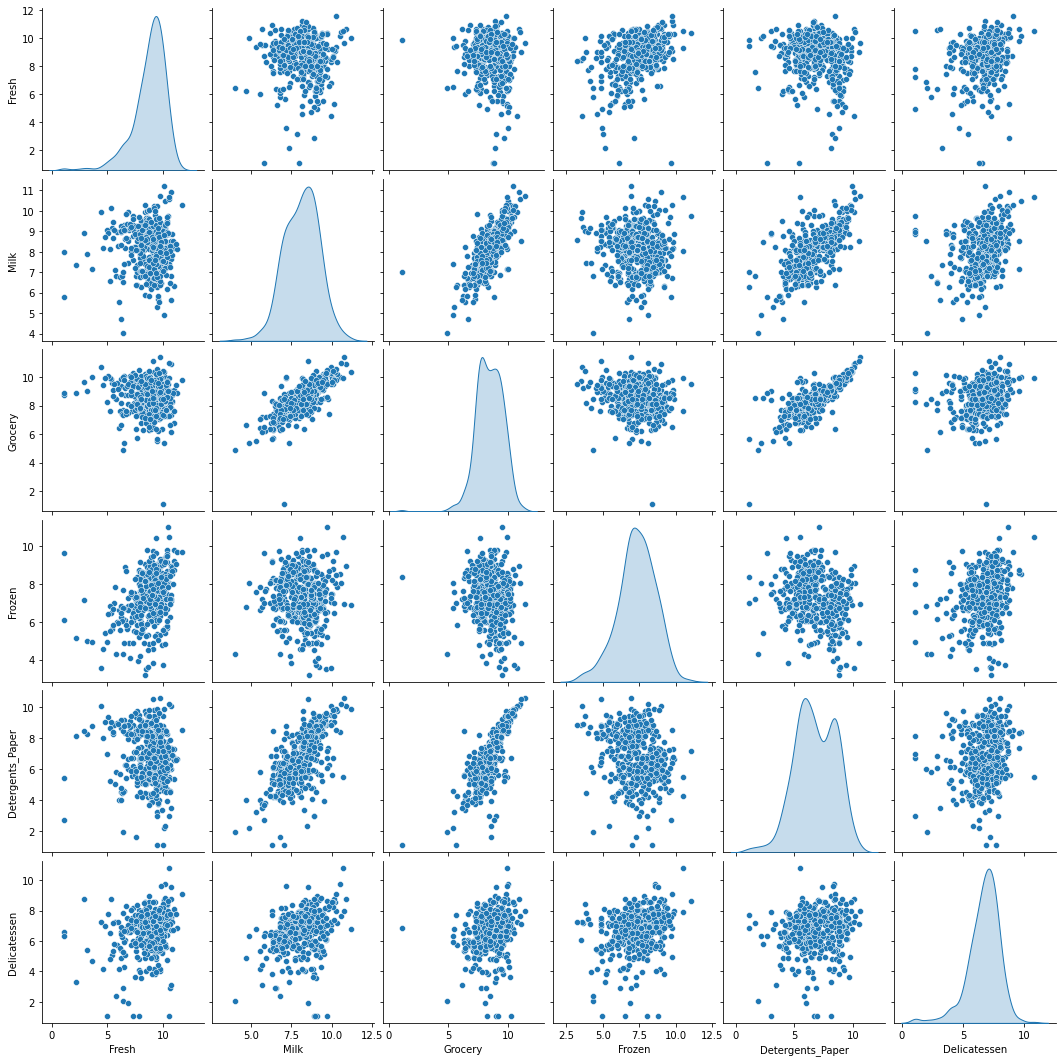

In [12]:
sns.pairplot(np.log(data), diag_kind = 'kde')

Natural logarithm tranformation appears to give more uniform distribution to data

In [13]:
log_data = np.log(data)
for feature in log_data.keys():
    Q1, Q3 = np.percentile(log_data[feature],25), np.percentile(log_data[feature],75)
    step = 1.5*(Q3-Q1)
    print(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    cleaned_data = log_data[((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]

        Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050 

In [14]:
cleaned_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


Principal Component Analysis

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit(cleaned_data)


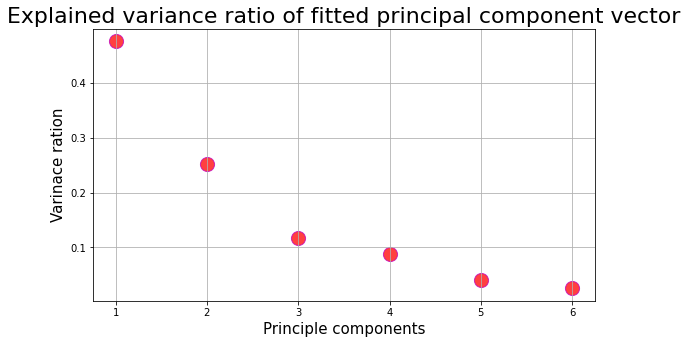

In [16]:
plt.figure(figsize=(9,5))
plt.scatter(x=[i+1 for i in range(len(df_pca.explained_variance_ratio_))], 
            y = df_pca.explained_variance_ratio_, s =200, alpha = 0.75, c ='red', edgecolor = 'm')
plt.grid(True)
plt.title("Explained variance ratio of fitted principal component vector", fontsize = 22)
plt.xlabel("Principle components", fontsize =15)
plt.ylabel("Varinace ration", fontsize = 15)
plt.show()

In [17]:
pca.components_

array([[ 0.18364896, -0.38693631, -0.45436249,  0.20404579, -0.74509578,
        -0.11535025],
       [-0.73906184, -0.18574767, -0.1027205 , -0.51178986, -0.10622459,
        -0.36813227],
       [-0.64625319,  0.08295584,  0.04208022,  0.66703929, -0.09876392,
         0.34497634],
       [-0.02815064,  0.17821108,  0.03002853, -0.49971426, -0.37236119,
         0.76038111],
       [ 0.01586934,  0.71753057,  0.30721166,  0.03785294, -0.48494725,
        -0.39231665],
       [-0.03705643,  0.51213973, -0.82822205, -0.01865092,  0.22353437,
         0.00851356]])

In [18]:
pca.explained_variance_ratio_

array([0.47635078, 0.25268057, 0.1175966 , 0.08832842, 0.03994204,
       0.02510159])

In [19]:
df = pd.DataFrame( columns = cleaned_data.columns)
i = 0
for i in range(len(df.columns)):
    df.loc[i] = pca.components_[i]

In [20]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.183649,-0.386936,-0.454362,0.204046,-0.745096,-0.115350
1,-0.739062,-0.185748,-0.102720,-0.511790,-0.106225,-0.368132
2,-0.646253,0.082956,0.042080,0.667039,-0.098764,0.344976
3,-0.028151,0.178211,0.030029,-0.499714,-0.372361,0.760381
4,0.015869,0.717531,0.307212,0.037853,-0.484947,-0.392317
5,-0.037056,0.512140,-0.828222,-0.018651,0.223534,0.008514


Text(0.5, 0, 'dimensions')

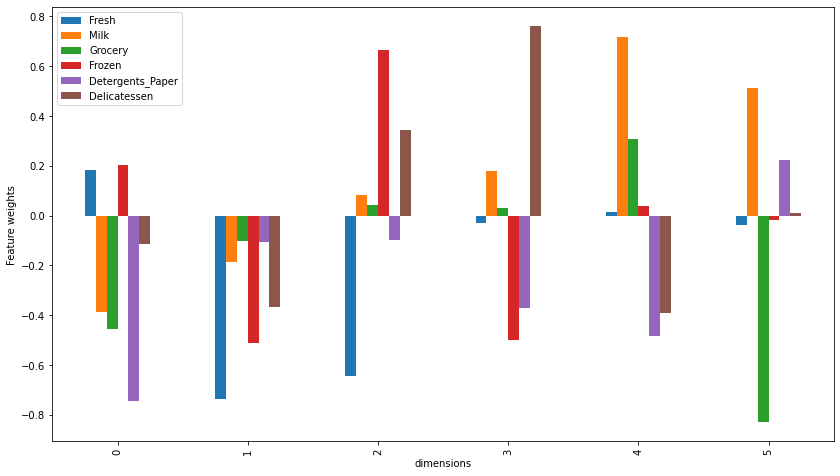

In [21]:
fig, ax = plt.subplots(figsize = (14,8))
df.plot(ax = ax, kind = 'bar')
ax.set_ylabel("Feature weights")
ax.set_xlabel("dimensions")


In [22]:
pca = PCA(n_components = 2)
pca.fit(cleaned_data)
reduced_data = pca.transform(cleaned_data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

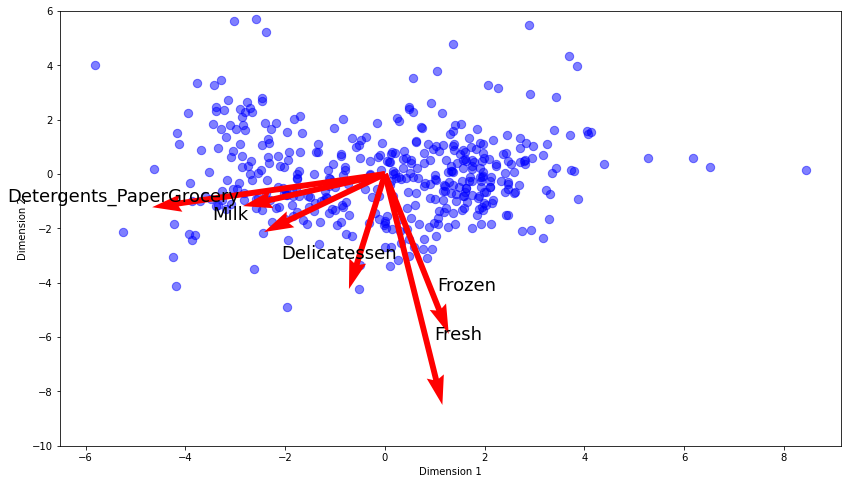

In [23]:
fig, ax =plt.subplots(figsize=(14,8))
ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
feature_vectors = pca.components_.T
arrow_size,text_pos = 8.0, 8.0,
for i, v in enumerate(feature_vectors):
    ax.quiver(0,0, arrow_size*v[0], arrow_size*v[1], color='red',scale = 20)
    ax.text(v[0]*text_pos, v[1]*text_pos, cleaned_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.ylim(-10,6)
plt.show()

In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clusterer = GaussianMixture(n_components=2, n_init=10, random_state=42)
clusterer.fit(reduced_data)

preds = clusterer.predict(reduced_data)
centers = clusterer.means_
score = silhouette_score(reduced_data,preds)

print('Silhouette score using GMM: ',score)

Silhouette score using GMM:  0.42422275539916887


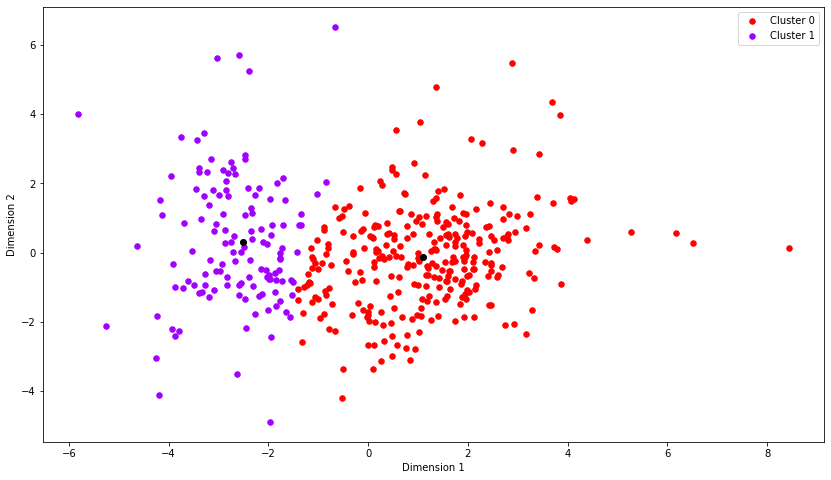

In [25]:
predictions = pd.DataFrame(preds, columns = ['Cluster'])
plot_data = pd.concat([predictions, reduced_data], axis = 1)
fig, ax = plt.subplots(figsize = (14,8))
cmap = cm.get_cmap('hsv')
for i, cluster in plot_data.groupby('Cluster'):   
    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', color = cmap(0 if i==0 else 200) , label = 'Cluster %i'%(i), s=30);
ax.scatter(x=centers[0][0],y=centers[0][1],color = 'black')
ax.scatter(x=centers[1][0],y=centers[1][1],color = 'black')

In [31]:
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers)
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print(true_centers)

            Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8694.0  2264.0   2841.0  2028.0             403.0         820.0
Segment 1  3264.0  8443.0  14001.0   780.0            5664.0        1061.0


In [36]:
samples = pd.DataFrame(data.loc[[7,150,227]], columns = data.keys()).reset_index(drop = True)
log_samples = np.log(samples)
pca_samples = pca.transform(log_samples)
sample_preds = clusterer.predict(pca_samples)
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"


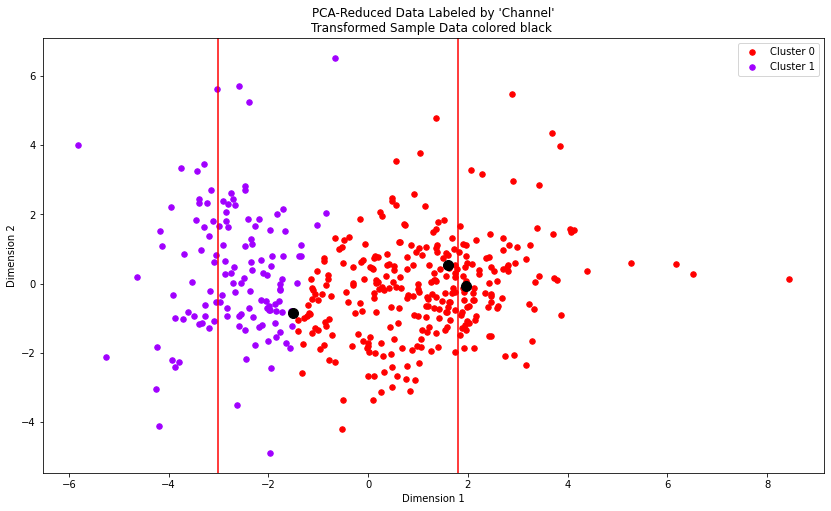

In [48]:
predictions = pd.DataFrame(preds, columns = ['Cluster'])
plot_data = pd.concat([predictions, reduced_data], axis = 1)
fig, ax = plt.subplots(figsize = (14,8))
cmap = cm.get_cmap('hsv')
for i, cluster in plot_data.groupby('Cluster'):   
    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', color = cmap(0 if i==0 else 200) , label = 'Cluster %i'%(i), s=30);
for i, sample in enumerate(pca_samples):
    ax.scatter(x = sample[0],y =sample[1],color = 'black', s=100)
ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data colored black ")
plt.axvline(x=1.8,color='r')
plt.axvline(x=-3,color='r')